In [12]:
import gdown
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

In [13]:
train_file_id = '1o8hcoAdtVuLziSKR1ZCVB5fZPVwjbCCH'
train_output_file = 'Dataset/sleep_disorder_classification.csv'

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=1o8hcoAdtVuLziSKR1ZCVB5fZPVwjbCCH
To: c:\Users\firma\Documents\Python\Bangkit\Capstone\TABULAR\Sleep Disorder Classification\Dataset\sleep_disorder_classification.csv
100%|██████████| 24.1k/24.1k [00:00<00:00, 193kB/s]


# Data Information

In [14]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [16]:
variables = [col for col in df.columns if df[col].nunique() <= 10]
for var in variables:
  print(f"====={var}=====")
  unique_values = df[var].unique()
  n_unique_values = df[var].nunique()
  value_counts = df[var].value_counts()

  print(f"Unique values in {var}: {unique_values}")
  print(f"Number of unique values in {var}: {n_unique_values}")
  print(f"Value counts in {var}:\n{value_counts}\n")

=====Gender=====
Unique values in Gender: ['Male' 'Female']
Number of unique values in Gender: 2
Value counts in Gender:
Gender
Male      189
Female    185
Name: count, dtype: int64

=====Quality of Sleep=====
Unique values in Quality of Sleep: [6 4 7 5 8 9]
Number of unique values in Quality of Sleep: 6
Value counts in Quality of Sleep:
Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

=====Stress Level=====
Unique values in Stress Level: [6 8 7 4 3 5]
Number of unique values in Stress Level: 6
Value counts in Stress Level:
Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

=====BMI Category=====
Unique values in BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Number of unique values in BMI Category: 4
Value counts in BMI Category:
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

=====Sleep Disorder=====
Unique va

# Data Cleaning

In [17]:
df.duplicated().sum()

np.int64(0)

## Replacing Nan to None

In [18]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Normal')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Drop Columns

In [19]:
df.drop(columns=['Person ID', 'Occupation'], inplace=True)

# Data Preprocessing

## Feature Engineering

In [20]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop(columns=['Blood Pressure'])

## Encoding

In [21]:
le = LabelEncoder()

columns_to_encode = ['Gender', 'BMI Category', 'Sleep Disorder']

for col in columns_to_encode:
  df[col] = le.fit_transform(df[col])

df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,5.9,4,30,8,2,85,3000,2,140,90


## Scalling

In [22]:
# num_columns = [col for col in df.columns if col not in ['Sleep Disorder']]
# ss = StandardScaler()

# df[num_columns] = ss.fit_transform(df[num_columns])
# df.head()

In [23]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,5.9,4,30,8,2,85,3000,2,140,90


# Modeling

## Train Test Split

In [24]:
features = [col for col in df.columns if col not in ['Sleep Disorder']]
target = 'Sleep Disorder'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## NN Model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation='relu'),  

    tf.keras.layers.Dense(3, activation='softmax')  
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,195 (188.26 KB)

 Trainable params: 47,299 (184.76 KB)

 Non-trainable params: 896 (3.50 KB)

In [26]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=0.001, verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=100,  
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr]  
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3075 - loss: 1.4376 - val_accuracy: 0.2000 - val_loss: 5.6473 - learning_rate: 1.0000e-04
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3416 - loss: 1.3389 - val_accuracy: 0.2133 - val_loss: 4.4271 - learning_rate: 1.0000e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3762 - loss: 1.2755 - val_accuracy: 0.2133 - val_loss: 3.7178 - learning_rate: 1.0000e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4759 - loss: 1.1873 - val_accuracy: 0.2133 - val_loss: 3.1569 - learning_rate: 1.0000e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4048 - loss: 1.2673 - val_accuracy: 0.2133 - val_loss: 2.6112 - learning_rate: 1.0000e-04
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5351 - loss: 1.0895 - val_accuracy: 0.1867 - val_loss: 2.2345 - learning_rate: 1.0000e-04
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5123

# Save Model

In [27]:
# model.save('Model Checkpoint/sleep_disorder model.h5')

# Model Evaluation

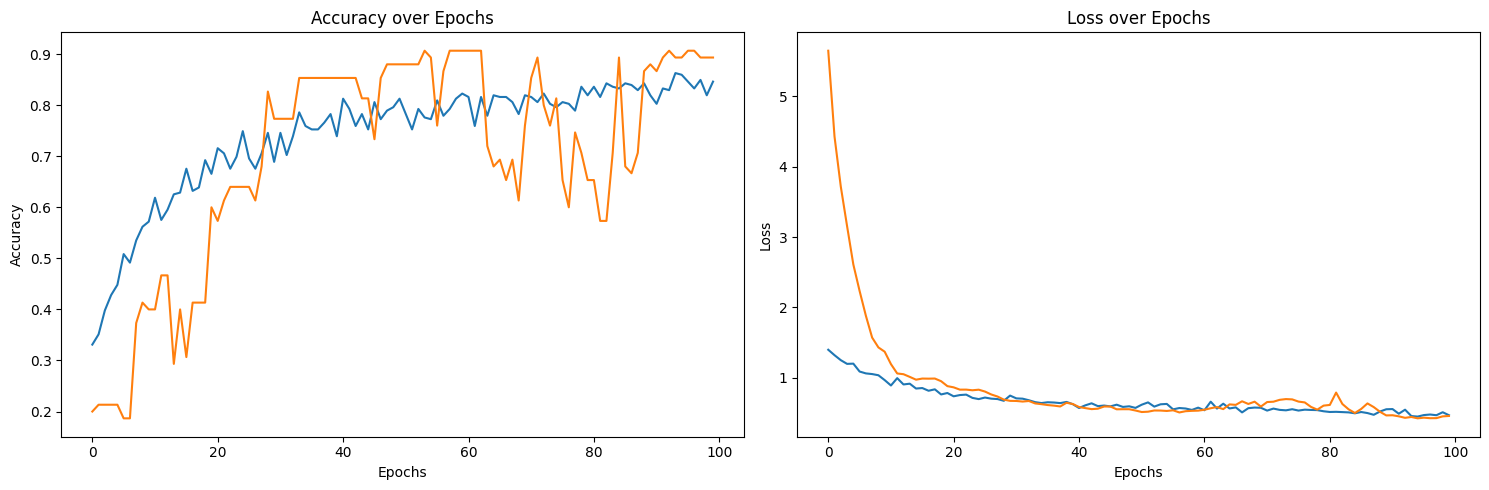

In [28]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()

data = [
    ('Accuracy', [train_accuracy, val_accuracy], ['Train Accuracy', 'Validation Accuracy']),
    ('Loss', [train_loss, val_loss], ['Train Loss', 'Validation Loss'])
]

for i, (title, data_values, labels) in enumerate(data):
    ax = axes[i]  
    ax.plot(data_values[0], label=labels[0])  
    ax.plot(data_values[1], label=labels[1])  
    ax.set_title(f'{title} over Epochs')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(title)

plt.tight_layout()
plt.show()


In [29]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print(classification_report(y_test, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.95      0.93      0.94        43
           2       0.82      0.88      0.85        16

    accuracy                           0.89        75
   macro avg       0.86      0.87      0.87        75
weighted avg       0.90      0.89      0.89        75



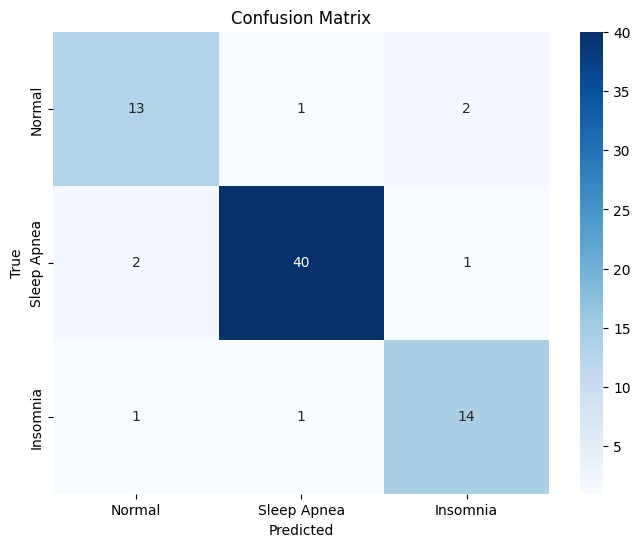

In [30]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Sleep Apnea', 'Insomnia'], yticklabels=['Normal', 'Sleep Apnea', 'Insomnia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()